In [2]:
import json 
BOOKS_PATH = "Books.jsonl/Books.jsonl"

with open(BOOKS_PATH, 'r') as f:
    for i in range(10):
        line = f.readline()
        record = json.loads(line)
        print(f"Line {i+1}:")
        for k, v in record.items():
            print(f"  {k}: {str(v)[:80]}")
        print("-" * 40)


Line 1:
  rating: 1.0
  title: Not a watercolor book! Seems like copies imo.
  text: It is definitely not a watercolor book.  The paper bucked completely.  The pages
  images: [{'small_image_url': 'https://m.media-amazon.com/images/I/516HBU7LQoL._SL256_.jp
  asin: B09BGPFTDB
  parent_asin: B09BGPFTDB
  user_id: AFKZENTNBQ7A7V7UXW5JJI6UGRYQ
  timestamp: 1642399598485
  helpful_vote: 0
  verified_purchase: True
----------------------------------------
Line 2:
  rating: 5.0
  title: Updated: after 1st arrived damaged this one is perfect
  text: Updated: after first book arrived very damaged the replacement arrived in perfec
  images: []
  asin: 0593235657
  parent_asin: 0593235657
  user_id: AFKZENTNBQ7A7V7UXW5JJI6UGRYQ
  timestamp: 1640629604904
  helpful_vote: 1
  verified_purchase: True
----------------------------------------
Line 3:
  rating: 5.0
  title: Excellent! I love it!
  text: I bought it for the bag on the front so it paid for itself with that imo.  I hav
  images: []
  asin

In [1]:
import json
import pandas as pd

BOOKS_PATH = "Books.jsonl/Books.jsonl"

def load_data(path):
    data = []
    with open(path, 'r') as f:
        for line in f:
            try:
                data.append(json.loads(line))
            except:
                continue
    return pd.DataFrame(data)

df = load_data(BOOKS_PATH)

# 👉 Print number of unique user 
num_users = df['user_id'].nunique()
print("📌 Number of user in dataset:", num_users)


📌 Number of user in dataset: 10297355


In [1]:
import json
import pandas as pd

# Path file meta_Books.jsonl
META_BOOKS_PATH = "meta_Books.jsonl/meta_Books.jsonl"

# === Load entire data from JSONL ===
def load_meta_data(path):
    data = []
    with open(path, 'r') as f:
        for line in f:
            try:
                data.append(json.loads(line))
            except:
                continue
    return pd.DataFrame(data)

# === Load data ===
df_meta = load_meta_data(META_BOOKS_PATH)

# === Check the structure of the data ===
print("Columns in meta_Books.jsonl:")
print(df_meta.columns)

# === Explore basic information about the data ===
print("\nBasic info of meta_Books.jsonl:")
print(df_meta.info())
with open(META_BOOKS_PATH, 'r') as f:
    for i in range(10):
        line = f.readline()
        record = json.loads(line)
        print(f"Line {i+1}:")
        for k, v in record.items():
            print(f"  {k}: {str(v)[:1000]}")
        print("-" * 40)


Columns in meta_Books.jsonl:
Index(['main_category', 'title', 'subtitle', 'author', 'average_rating',
       'rating_number', 'features', 'description', 'price', 'images', 'videos',
       'store', 'categories', 'details', 'parent_asin', 'bought_together'],
      dtype='object')

Basic info of meta_Books.jsonl:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4448181 entries, 0 to 4448180
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   main_category    object 
 1   title            object 
 2   subtitle         object 
 3   author           object 
 4   average_rating   float64
 5   rating_number    int64  
 6   features         object 
 7   description      object 
 8   price            object 
 9   images           object 
 10  videos           object 
 11  store            object 
 12  categories       object 
 13  details          object 
 14  parent_asin      object 
 15  bought_together  object 
dtypes: float64(1), int64(1), obje

In [1]:
import json
from collections import defaultdict

# Function to flatten nested JSON structures (dictionaries or lists)
def flatten_json(y, prefix=""):
    out = {}
    if isinstance(y, dict):
        for key, value in y.items():
            new_key = f"{prefix}.{key}" if prefix else key
            out.update(flatten_json(value, new_key))
    elif isinstance(y, list):
        for i, item in enumerate(y):
            new_key = f"{prefix}[{i}]"
            out.update(flatten_json(item, new_key))
    else:
        out[prefix] = y
    return out

# Function to extract feature tokens by key from a file.
# Returns a dictionary: key -> set(tokens) for that key.
def extract_features_by_key(filepath, expected_keys):
    key_tokens = defaultdict(set)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                record = json.loads(line)
            except json.JSONDecodeError:
                continue
            
            for key in expected_keys:
                if key in record:
                    val = record[key]
                    # If the value is a dictionary or list, flatten it to get subkeys.
                    if isinstance(val, dict) or isinstance(val, list):
                        flat_dict = flatten_json(val, key)
                        for flat_key, flat_val in flat_dict.items():
                            token = f"{flat_key}={flat_val}"
                            key_tokens[key].add(token)
                    else:
                        token = f"{key}={val}"
                        key_tokens[key].add(token)
    return key_tokens

# Define the keys for the two files based on the provided columns

# Keys for the Books.jsonl file (reviews)
books_keys = [
    "rating",
    "title",
    "text",
    "images",
    "asin",
    "parent_asin",
    "user_id",
    "timestamp",
    "helpful_vote",
    "verified_purchase"
]

# Keys for the meta_Books.jsonl file (metadata)
meta_books_keys = [
    "main_category",
    "title",
    "subtitle",
    "author",
    "average_rating",
    "rating_number",
    "features",
    "description",
    "price",
    "images",
    "videos",
    "store",
    "categories",
    "details",
    "parent_asin",
    "bought_together"
]

# File paths for Amazon Books dataset (adjust as needed)
BOOKS_PATH = "Books.jsonl/Books.jsonl"
META_BOOKS_PATH = "meta_Books.jsonl/meta_Books.jsonl"

# Extract tokens from the Books file
books_features_by_key = extract_features_by_key(BOOKS_PATH, books_keys)

# Extract tokens from the meta_Books file
meta_books_features_by_key = extract_features_by_key(META_BOOKS_PATH, meta_books_keys)

# Detailed output for Books.jsonl
print("Detailed counts for Books (reviews):")
total_books_features = set()
for key in books_keys:
    tokens = books_features_by_key.get(key, set())
    total_books_features.update(tokens)
    print(f"  {key}: {len(tokens)} unique tokens")
print(f"  Total unique features from Books: {len(total_books_features)}\n")

# Detailed output for meta_Books.jsonl
print("Detailed counts for meta_Books (metadata):")
total_meta_books_features = set()
for key in meta_books_keys:
    tokens = meta_books_features_by_key.get(key, set())
    total_meta_books_features.update(tokens)
    print(f"  {key}: {len(tokens)} unique tokens")
print(f"  Total unique features from meta_Books: {len(total_meta_books_features)}\n")

# Overall union of unique features from both files
all_features = total_books_features.union(total_meta_books_features)
print(f"Overall unique feature count (#Feature): {len(all_features)}")


Detailed counts for Books (reviews):
  rating: 6 unique tokens
  title: 15023238 unique tokens
  text: 26350006 unique tokens
  images: 2367237 unique tokens
  asin: 4493336 unique tokens
  parent_asin: 4446065 unique tokens
  user_id: 10297355 unique tokens
  timestamp: 28326834 unique tokens
  helpful_vote: 1437 unique tokens
  verified_purchase: 2 unique tokens
  Total unique features from Books: 91305516

Detailed counts for meta_Books (metadata):
  main_category: 26 unique tokens
  title: 3864967 unique tokens
  subtitle: 198425 unique tokens
  author: 2686976 unique tokens
  average_rating: 41 unique tokens
  rating_number: 30258 unique tokens
  features: 12808749 unique tokens
  description: 19275129 unique tokens
  price: 47939 unique tokens
  images: 3046355 unique tokens
  videos: 179617 unique tokens
  store: 2280411 unique tokens
  categories: 3211 unique tokens
  details: 10024899 unique tokens
  parent_asin: 4448181 unique tokens
  bought_together: 1 unique tokens
  Total

In [2]:
import json
import pandas as pd

# Path to the JSONL file
BOOKS_PATH = "Books.jsonl/Books.jsonl"

# === Load limited lines from JSONL ===
def load_meta_data(path, max_lines=1000):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= max_lines:
                break
            try:
                data.append(json.loads(line))
            except:
                continue
    return pd.DataFrame(data)

# === Load first 1000 rows safely ===
df_meta = load_meta_data(BOOKS_PATH, max_lines=1000)

# === Display structure ===
print("✅ Columns in Books.jsonl:")
print(df_meta.columns)

# === Print first 10 records line by line ===
with open(BOOKS_PATH, 'r', encoding='utf-8') as f:
    for i in range(10):
        line = f.readline()
        try:
            record = json.loads(line)
            print(f"\n🔹 Line {i+1}:")
            for k, v in record.items():
                print(f"  {k}: {str(v)[:200]}")
            print("-" * 40)
        except:
            continue

✅ Columns in Books.jsonl:
Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

🔹 Line 1:
  rating: 1.0
  title: Not a watercolor book! Seems like copies imo.
  text: It is definitely not a watercolor book.  The paper bucked completely.  The pages honestly appear to be photo copies of other pictures. I say that bc if you look at the seal pics you can see the tell t
  images: [{'small_image_url': 'https://m.media-amazon.com/images/I/516HBU7LQoL._SL256_.jpg', 'medium_image_url': 'https://m.media-amazon.com/images/I/516HBU7LQoL._SL800_.jpg', 'large_image_url': 'https://m.med
  asin: B09BGPFTDB
  parent_asin: B09BGPFTDB
  user_id: AFKZENTNBQ7A7V7UXW5JJI6UGRYQ
  timestamp: 1642399598485
  helpful_vote: 0
  verified_purchase: True
----------------------------------------

🔹 Line 2:
  rating: 5.0
  title: Updated: after 1st arrived damaged this one is perfect
  text: Updated: after first b

In [4]:
import json

META_BOOKS_PATH = "meta_Books.jsonl/meta_Books.jsonl"
unique_main_categories = set()

with open(META_BOOKS_PATH, 'r', encoding='utf-8') as f:
    for line in f:
        try:
            obj = json.loads(line)
            cat = obj.get('main_category')
            if cat:
                unique_main_categories.add(cat)
        except:
            continue

print(sorted(unique_main_categories))


['AMAZON FASHION', 'All Beauty', 'All Electronics', 'Amazon Home', 'Arts, Crafts & Sewing', 'Audible Audiobooks', 'Automotive', 'Baby', 'Books', 'Buy a Kindle', 'Camera & Photo', 'Cell Phones & Accessories', 'Computers', 'Health & Personal Care', 'Home Audio & Theater', 'Industrial & Scientific', 'Musical Instruments', 'Office Products', 'Pet Supplies', 'Software', 'Sports & Outdoors', 'Tools & Home Improvement', 'Toys & Games', 'Unique Finds']


In [ ]:
import json

META_BOOKS_PATH = "meta_Books.jsonl/meta_Books.jsonl"

def get_unique_values(field_name):
    unique_values = set()
    with open(META_BOOKS_PATH, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                obj = json.loads(line)
                value = obj.get(field_name)
                if value:
                    unique_values.add(str(value))  # convert list/dict to string to make it hashable
            except:
                continue
    return sorted(unique_values)


# For bought_together
print("\n🛒 Unique 'bought_together':")
print(get_unique_values('bought_together'))



🛒 Unique 'bought_together':
[]


In [ ]:
import json

META_BOOKS_PATH = "meta_Books.jsonl/meta_Books.jsonl"

found = 0

with open(META_BOOKS_PATH, 'r', encoding='utf-8') as f:
    for line in f:
        try:
            obj = json.loads(line)
            value = obj.get('bought_together')
            if value not in [None, [], ""]:
                print("✅ Found:", value)
                found += 1
                if found >= 10:  
                    break
        except:
            continue

print(f"\nTotal non-empty 'bought_together': {found}")



Total non-empty 'bought_together': 0


In [2]:
import json

META_BOOKS_PATH = "meta_Books.jsonl/meta_Books.jsonl"
OUTPUT_PATH = "meta_Books.jsonl/meta_Books_filtered.jsonl"

# Fields to drop
drop_fields = ['title', 'images', 'videos', 'description', 'features']

with open(META_BOOKS_PATH, 'r', encoding='utf-8') as infile, \
     open(OUTPUT_PATH, 'w', encoding='utf-8') as outfile:
    
    for line in infile:
        try:
            obj = json.loads(line)

            # Skip if main_category is not "Books"
            if obj.get('main_category') != 'Books':
                continue

            # Drop specified fields
            for field in drop_fields:
                obj.pop(field, None)

            # Write the filtered object
            outfile.write(json.dumps(obj) + '\n')

        except Exception as e:
            continue  # Skip malformed lines

print("✅ Successfully filtered fields and kept only entries with main_category == 'Books'.")


✅ Successfully filtered fields and kept only entries with main_category == 'Books'.


In [ ]:
import json

# File paths
BOOKS_PATH = "Books.jsonl/Books.jsonl"
META_BOOKS_FILTERED_PATH = "meta_Books.jsonl/meta_Books_processed.jsonl"
OUTPUT_PATH = "Books.jsonl/Books_processed.jsonl"

# Fields to drop
drop_fields = ['images', 'text', 'title']

# Step 1: Collect valid parent_asin from filtered meta
valid_parent_asins = set()
with open(META_BOOKS_FILTERED_PATH, 'r', encoding='utf-8') as meta_file:
    for line in meta_file:
        try:
            obj = json.loads(line)
            parent_asin = obj.get('parent_asin')
            if parent_asin:
                valid_parent_asins.add(parent_asin)
        except:
            continue

# Step 2: Filter books
with open(BOOKS_PATH, 'r', encoding='utf-8') as infile, \
     open(OUTPUT_PATH, 'w', encoding='utf-8') as outfile:
    
    for line in infile:
        try:
            obj = json.loads(line)

            # Skip if parent_asin not in valid set
            if obj.get('parent_asin') not in valid_parent_asins:
                continue

            # Drop unnecessary fields
            for field in drop_fields:
                obj.pop(field, None)

            outfile.write(json.dumps(obj) + '\n')
        except:
            continue

print("✅ Successfully filtered Books.jsonl with only valid parent_asin and removed specified fields.")


✅ Successfully filtered Books.jsonl with only valid parent_asin and removed specified fields.


In [ ]:
import json
import numpy as np
from collections import defaultdict

# File paths
META_BOOKS_PATH = "meta_Books.jsonl/meta_Books.jsonl"
META_BOOKS_OUTPUT_PATH = "meta_Books.jsonl/meta_Books_processed.jsonl"
BOOKS_PATH = "Books.jsonl/Books.jsonl"
BOOKS_OUTPUT_PATH = "Books.jsonl/Books_processed.jsonl"
BOOKS_OUTPUT_WITH_USER_FEATS = "Books.jsonl/Books_processed_with_user_feats.jsonl"

# Fields to drop
meta_drop_fields = ['title', 'images', 'videos', 'description', 'features']
books_drop_fields = ['images', 'text', 'title']

# =========================================
# Step 1: Process meta_Books.jsonl
# =========================================
parent_asin_mapping = {}
parent_counter = 1

with open(META_BOOKS_PATH, 'r', encoding='utf-8') as infile, \
     open(META_BOOKS_OUTPUT_PATH, 'w', encoding='utf-8') as outfile:
    
    for line in infile:
        try:
            obj = json.loads(line)
            if obj.get('main_category') != 'Books':
                continue

            for field in meta_drop_fields:
                obj.pop(field, None)

            if "author" in obj and isinstance(obj["author"], dict):
                for key in ["avatar", "about"]:
                    obj["author"].pop(key, None)

            if "details" in obj and isinstance(obj["details"], dict):
                for key in ["ISBN 10", "ISBN 13", "Item Weight", "Dimensions"]:
                    obj["details"].pop(key, None)

            original_parent = obj.get('parent_asin')
            if original_parent:
                if original_parent not in parent_asin_mapping:
                    parent_asin_mapping[original_parent] = parent_counter
                    parent_counter += 1
                obj['parent_asin'] = parent_asin_mapping[original_parent]

            outfile.write(json.dumps(obj) + '\n')
        except:
            continue

print("✅ Meta Books processed with parent_asin remapped and nested fields dropped.")

# =========================================
# Step 2: Process Books.jsonl
# =========================================
user_id_mapping = {}
user_counter = 1
raw_user_data = []

with open(BOOKS_PATH, 'r', encoding='utf-8') as infile, \
     open(BOOKS_OUTPUT_PATH, 'w', encoding='utf-8') as outfile:
    
    for line in infile:
        try:
            obj = json.loads(line)
            original_parent = obj.get('parent_asin')
            if original_parent not in parent_asin_mapping:
                continue

            obj['parent_asin'] = parent_asin_mapping[original_parent]

            original_user = obj.get('user_id')
            if original_user:
                if original_user not in user_id_mapping:
                    user_id_mapping[original_user] = user_counter
                    user_counter += 1
                obj['user_id'] = user_id_mapping[original_user]

            for field in books_drop_fields:
                obj.pop(field, None)

            outfile.write(json.dumps(obj) + '\n')
            raw_user_data.append(obj)  # lưu lại để xử lý tiếp
        except:
            continue

print("✅ Books processed with valid parent_asin and user_id remapped.")

# =========================================
# Step 3: Calculate user-level features
# =========================================
user_reviews = defaultdict(list)
for obj in raw_user_data:
    user_reviews[obj['user_id']].append(obj)

with open(BOOKS_OUTPUT_WITH_USER_FEATS, 'w', encoding='utf-8') as outfile:
    for obj in raw_user_data:
        uid = obj['user_id']
        reviews = user_reviews[uid]

        ratings = [r.get('rating', 0) for r in reviews if 'rating' in r]
        user_avg_rating = np.mean(ratings) if ratings else 0

        user_total_reviews = len(reviews)

        verified_flags = [r.get('verified_purchase', False) for r in reviews]
        verified_ratio = sum(verified_flags) / len(verified_flags) if verified_flags else 0

        helpful = obj.get('helpful_vote', 0)

        obj['user_average_rating'] = round(user_avg_rating, 2)
        obj['user_total_reviews'] = user_total_reviews
        obj['user_verified_purchase_ratio'] = round(verified_ratio, 2)
        obj['helpful_vote'] = helpful  # giữ nguyên nếu đã có

        outfile.write(json.dumps(obj) + '\n')

print("✅ User-level features added ➜ Books_processed_with_user_feats.jsonl")


✅ Meta Books processed with parent_asin remapped and nested fields dropped.


In [1]:
import os
import json

def create_review_file(input_path, output_path, max_lines=1000):
    # Open the input file and create the output file
    with open(input_path, 'r', encoding='utf-8') as infile, \
         open(output_path, 'w', encoding='utf-8') as outfile:
        # Loop through each line and write to output until reaching max_lines
        for i, line in enumerate(infile):
            if i >= max_lines:
                break
            outfile.write(line)

# Original file paths
BOOKS_PATH = "Books.jsonl/Books.jsonl"
META_BOOKS_PATH = "meta_Books.jsonl/meta_Books.jsonl"

# Output review file paths
REVIEW_BOOKS_PATH = "Books.jsonl/review_books.jsonl"
REVIEW_META_BOOKS_PATH = "meta_Books.jsonl/review_meta_books.jsonl"

# Create review files with the first 1000 lines
create_review_file(BOOKS_PATH, REVIEW_BOOKS_PATH)
create_review_file(META_BOOKS_PATH, REVIEW_META_BOOKS_PATH)

print("✅ Created review files with the first 1000 lines from both JSONL files.")


✅ Created review files with the first 1000 lines from both JSONL files.


In [ ]:
import json

INPUT_PATH = "meta_Books.jsonl/meta_Books.jsonl"
bought_together_values = set()

with open(INPUT_PATH, 'r', encoding='utf-8') as infile:
    for line in infile:
        try:
            obj = json.loads(line)
            value = obj.get('bought_together')
            if value is not None:
                bought_together_values.add(json.dumps(value))  
        except:
            continue

print("📦 Unique values in 'bought_together':")
for v in bought_together_values:
    print(v)


📦 Unique values in 'bought_together':


In [9]:
import json
import pandas as pd

# Path file meta_Books.jsonl
META_BOOKS_PATH = "meta_Books.jsonl/meta_Books_processed.jsonl"

# === Load entire data from JSONL ===
def load_meta_data(path):
    data = []
    with open(path, 'r') as f:
        for line in f:
            try:
                data.append(json.loads(line))
            except:
                continue
    return pd.DataFrame(data)

# === Load data ===
df_meta = load_meta_data(META_BOOKS_PATH)

# === Check the structure of the data ===
print("Columns in meta_Books.jsonl:")
print(df_meta.columns)

# === Explore basic information about the data ===
print("\nBasic info of meta_Books.jsonl:")
print(df_meta.info())
with open(META_BOOKS_PATH, 'r') as f:
    for i in range(10):
        line = f.readline()
        record = json.loads(line)
        print(f"Line {i+1}:")
        for k, v in record.items():
            print(f"  {k}: {str(v)[:1000]}")
        print("-" * 40)


Columns in meta_Books.jsonl:
Index(['main_category', 'title', 'author', 'average_rating', 'rating_number',
       'features', 'description', 'price', 'images', 'videos', 'store',
       'categories', 'details', 'parent_asin'],
      dtype='object')

Basic info of meta_Books.jsonl:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078785 entries, 0 to 4078784
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   main_category   object 
 1   title           object 
 2   author          object 
 3   average_rating  float64
 4   rating_number   int64  
 5   features        object 
 6   description     object 
 7   price           object 
 8   images          object 
 9   videos          object 
 10  store           object 
 11  categories      object 
 12  details         object 
 13  parent_asin     object 
dtypes: float64(1), int64(1), object(12)
memory usage: 435.7+ MB
None
Line 1:
  main_category: Books
  title: Chaucer
  author: Peter Ackroyd

In [ ]:
import json

INPUT_PATH = "meta_Books.jsonl/meta_Books.jsonl"
OUTPUT_PATH = "meta_Books.jsonl/meta_Books_processed.jsonl"

# Fields to remove
drop_fields = ['title', 'images', 'videos', 'description', 'features', 'subtitle', 'bought_together']

# Dictionary to map unique parent_asin to a numeric id
asin_mapping = {}
current_id = 1

with open(INPUT_PATH, 'r', encoding='utf-8') as infile, \
     open(OUTPUT_PATH, 'w', encoding='utf-8') as outfile:

    for line in infile:
        try:
            obj = json.loads(line)

            # Keep only items where main_category == "Books"
            if obj.get('main_category') != 'Books':
                continue

            # Drop unwanted fields
            for field in drop_fields:
                obj.pop(field, None)

            # Keep only the author name (as string)
            if isinstance(obj.get('author'), dict):
                obj['author'] = obj['author'].get('name', None)
            else:
                obj['author'] = None

            # Keep only 'Language' and 'Paperback' from details
            if isinstance(obj.get('details'), dict):
                details = obj['details']
                obj['details'] = {
                    k: details[k]
                    for k in ['Language', 'Paperback']
                    if k in details
                }
            else:
                obj['details'] = {}

            # Drop the category "Books" from the categories field.
            if 'categories' in obj:
                if isinstance(obj['categories'], list):
                    obj['categories'] = [cat for cat in obj['categories'] if cat.strip().lower() != 'books']
                elif isinstance(obj['categories'], str):
                    categories = [cat.strip() for cat in obj['categories'].split(',')]
                    obj['categories'] = [cat for cat in categories if cat.lower() != 'books']

            # Swap the unique parent_asin to a numeric id
            parent_asin = obj.get('parent_asin')
            if parent_asin is not None:
                if parent_asin not in asin_mapping:
                    asin_mapping[parent_asin] = current_id
                    current_id += 1
                obj['parent_asin'] = asin_mapping[parent_asin]

            # Write the cleaned object to the output file
            outfile.write(json.dumps(obj) + '\n')

        except Exception:
            continue  # Skip malformed lines

print("✅ Successfully processed and saved to meta_Books_processed.jsonl.")


✅ Successfully processed and saved to meta_Books_processed.jsonl.


In [ ]:
import json
from collections import defaultdict

# File paths
BOOKS_PATH = "Books.jsonl/Books.jsonl"
META_BOOKS_FILTERED_PATH = "meta_Books.jsonl/meta_Books_processed.jsonl"
OUTPUT_PATH = "Books.jsonl/Books_processed.jsonl"

# Fields to drop from each review
drop_fields = ['images', 'text', 'title']

# Step 1: Collect valid parent_asins from filtered metadata
valid_parent_asins = set()
with open(META_BOOKS_FILTERED_PATH, 'r', encoding='utf-8') as meta_file:
    for line in meta_file:
        try:
            obj = json.loads(line)
            parent_asin = obj.get('parent_asin')
            if parent_asin:
                valid_parent_asins.add(parent_asin)
        except Exception:
            continue

# Step 2: First pass — filter reviews and aggregate user statistics
user_data = defaultdict(lambda: {
    'total_reviews': 0,
    'total_rating': 0.0,
    'total_helpful_votes': 0,
    'verified_count': 0,
    'timestamps': []
})

filtered_reviews = []

with open(BOOKS_PATH, 'r', encoding='utf-8') as infile:
    for line in infile:
        try:
            obj = json.loads(line)

            # Only process reviews whose parent_asin exists in the valid set.
            if obj.get('parent_asin') not in valid_parent_asins:
                continue

            # Drop unwanted fields
            for field in drop_fields:
                obj.pop(field, None)

            filtered_reviews.append(obj)

            # Update user statistics using the original user_id
            user_id = obj['user_id']
            user_data[user_id]['total_reviews'] += 1
            user_data[user_id]['total_rating'] += obj.get('rating', 0)
            user_data[user_id]['total_helpful_votes'] += obj.get('helpful_vote', 0)
            if obj.get('verified_purchase'):
                user_data[user_id]['verified_count'] += 1
            user_data[user_id]['timestamps'].append(obj.get('timestamp'))

        except Exception:
            continue

# Step 3: Map unique user_ids to numeric ids and write enriched reviews
user_mapping = {}
current_user_numeric_id = 1

with open(OUTPUT_PATH, 'w', encoding='utf-8') as outfile:
    for obj in filtered_reviews:
        original_user_id = obj['user_id']
        # Create a new mapping if not seen before.
        if original_user_id not in user_mapping:
            user_mapping[original_user_id] = current_user_numeric_id
            current_user_numeric_id += 1

        # Replace user_id with the numeric id.
        obj['user_id'] = user_mapping[original_user_id]

        # Enrich the review with aggregated user statistics.
        data = user_data[original_user_id]
        total_reviews = data['total_reviews']
        obj['user_total_reviews'] = total_reviews
        obj['user_average_rating'] = round(data['total_rating'] / total_reviews, 2)
        obj['user_total_helpful_votes'] = data['total_helpful_votes']
        obj['user_verified_purchase_ratio'] = round(data['verified_count'] / total_reviews, 2)

        # Write the enriched object to the output file.
        outfile.write(json.dumps(obj) + '\n')

print("✅ Successfully filtered, enriched reviews with user-level statistics, and swapped user_id to numeric ids.")


In [1]:
#!/usr/bin/env python
import json
import datetime
import csv
from collections import defaultdict, Counter
import numpy as np
import argparse
import random

#####################################
# Part 1: Process meta_Books.jsonl
#####################################

META_INPUT_PATH = "meta_Books.jsonl/meta_Books.jsonl"
META_OUTPUT_PATH = "meta_Books.jsonl/meta_Books_processed.jsonl"

# Fields to drop in meta file
meta_drop_fields = ['title', 'images', 'videos', 'description', 'features', 'subtitle', 'bought_together']

# Mapping for unique parent_asin to numeric id (1, 2, 3, ...)
asin_mapping = {}
current_asin_id = 1

with open(META_INPUT_PATH, 'r', encoding='utf-8') as infile, \
     open(META_OUTPUT_PATH, 'w', encoding='utf-8') as outfile:
    for line in infile:
        try:
            obj = json.loads(line)
            # Only keep items with main_category equal to "Books"
            if obj.get('main_category') != 'Books':
                continue

            # Drop unwanted fields
            for field in meta_drop_fields:
                obj.pop(field, None)

            # Process the author field: if it's a dict, keep the 'name' value; otherwise, set to None
            if isinstance(obj.get('author'), dict):
                obj['author'] = obj['author'].get('name', None)
            else:
                obj['author'] = None

            # Process the details field: keep only 'Language' and 'Paperback'
            if isinstance(obj.get('details'), dict):
                details = obj['details']
                obj['details'] = {k: details[k] for k in ['Language', 'Paperback'] if k in details}
            else:
                obj['details'] = {}

            # Process categories: remove the category "Books"
            if 'categories' in obj:
                if isinstance(obj['categories'], list):
                    obj['categories'] = [cat for cat in obj['categories'] if cat.strip().lower() != 'books']
                elif isinstance(obj['categories'], str):
                    categories = [cat.strip() for cat in obj['categories'].split(',')]
                    obj['categories'] = [cat for cat in categories if cat.lower() != 'books']

            # Process parent_asin: check for missing value before converting to string
            parent_asin_raw = obj.get('parent_asin')
            if parent_asin_raw is None:
                # Skip items with missing parent_asin
                continue
            parent_asin = str(parent_asin_raw)
            if parent_asin not in asin_mapping:
                asin_mapping[parent_asin] = current_asin_id
                current_asin_id += 1
            obj['parent_asin'] = asin_mapping[parent_asin]

            outfile.write(json.dumps(obj) + '\n')
        except Exception:
            continue

print("✅ Meta Books processed and saved to:", META_OUTPUT_PATH)
print(f"  Total unique items mapped: {len(asin_mapping)}")

#####################################
# Part 2: Process Books.jsonl (Reviews and User-Level Statistics)
#####################################

BOOKS_INPUT_PATH = "Books.jsonl/Books.jsonl"
BOOKS_OUTPUT_PATH = "Books.jsonl/Books_processed.jsonl"

# Fields to drop in Books reviews
books_drop_fields = ['images', 'text', 'title']

# Build a set of valid original parent_asins (as strings) from the meta file
valid_original_parent_asins = set(asin_mapping.keys())

filtered_reviews = []
user_data = defaultdict(lambda: {
    'total_reviews': 0,
    'total_rating': 0.0,
    'total_helpful_votes': 0,
    'verified_count': 0,
    'timestamps': []
})

with open(BOOKS_INPUT_PATH, 'r', encoding='utf-8') as infile:
    for line in infile:
        try:
            obj = json.loads(line)
            # Convert the parent_asin from the Books file to string for consistency
            original_parent = str(obj.get('parent_asin'))
            # Only process reviews whose original parent_asin exists in the meta mapping
            if original_parent not in valid_original_parent_asins:
                continue

            # Replace parent_asin with its numeric mapping
            obj['parent_asin'] = asin_mapping[original_parent]

            # Drop unwanted fields
            for field in books_drop_fields:
                obj.pop(field, None)

            filtered_reviews.append(obj)

            # Aggregate user statistics using the original user_id
            user_id = obj['user_id']
            user_data[user_id]['total_reviews'] += 1
            user_data[user_id]['total_rating'] += obj.get('rating', 0)
            user_data[user_id]['total_helpful_votes'] += obj.get('helpful_vote', 0)
            if obj.get('verified_purchase'):
                user_data[user_id]['verified_count'] += 1
            user_data[user_id]['timestamps'].append(obj.get('timestamp'))
        except Exception:
            continue

# Map unique user_ids (original strings) to numeric ids (1, 2, 3, ...)
user_mapping = {}
current_user_numeric_id = 1

with open(BOOKS_OUTPUT_PATH, 'w', encoding='utf-8') as outfile:
    for obj in filtered_reviews:
        original_user_id = obj['user_id']
        if original_user_id not in user_mapping:
            user_mapping[original_user_id] = current_user_numeric_id
            current_user_numeric_id += 1

        # Replace user_id with its numeric mapping
        obj['user_id'] = user_mapping[original_user_id]

        # Enrich the review with aggregated user-level statistics
        stats = user_data[original_user_id]
        total_reviews = stats['total_reviews']
        if total_reviews > 0:
            obj['user_total_reviews'] = total_reviews
            obj['user_average_rating'] = round(stats['total_rating'] / total_reviews, 2)
            obj['user_total_helpful_votes'] = stats['total_helpful_votes']
            obj['user_verified_purchase_ratio'] = round(stats['verified_count'] / total_reviews, 2)
        else:
            obj['user_total_reviews'] = 0
            obj['user_average_rating'] = 0
            obj['user_total_helpful_votes'] = 0
            obj['user_verified_purchase_ratio'] = 0

        outfile.write(json.dumps(obj) + '\n')

print("✅ Books processed with enriched user-level statistics and user_id remapped to numbers.")
print(f"  Total unique users mapped: {len(user_mapping)}")


✅ Meta Books processed and saved to: meta_Books.jsonl/meta_Books_processed.jsonl
  Total unique items mapped: 4078785
✅ Books processed with enriched user-level statistics and user_id remapped to numbers.
  Total unique users mapped: 8892810


In [17]:
import json
import pandas as pd

# === File paths ===
META_BOOKS_PATH = "meta_Books.jsonl/meta_Books_processed.jsonl"
BOOKS_PATH = "Books.jsonl/Books_processed.jsonl"

# === Load first N lines of JSONL ===
def load_jsonl(path, max_lines=1000):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= max_lines:
                break
            try:
                data.append(json.loads(line))
            except:
                continue
    return pd.DataFrame(data)

# === Load datasets (first 1000 lines) ===
df_meta = load_jsonl(META_BOOKS_PATH, max_lines=1000)
df_books = load_jsonl(BOOKS_PATH, max_lines=1000)

# === Print structure and info for meta_Books_processed.jsonl ===
print("🗂️ Columns in meta_Books_processed.jsonl:")
print(df_meta.columns)

print("\n📊 Basic info of meta_Books_processed.jsonl:")
print(df_meta.info())

print("\n📌 Sample records from meta_Books_processed.jsonl:")
for i in range(min(5, len(df_meta))):
    record = df_meta.iloc[i]
    print(f"\n🔹 Line {i+1}:")
    for k, v in record.items():
        print(f"  {k}: {str(v)[:1000]}")
    print("-" * 40)

# === Print structure and info for Books_processed.jsonl ===
print("\n🗂️ Columns in Books_processed.jsonl:")
print(df_books.columns)

print("\n📊 Basic info of Books_processed.jsonl:")
print(df_books.info())

print("\n📌 Sample records from Books_processed.jsonl:")
for i in range(min(5, len(df_books))):
    record = df_books.iloc[i]
    print(f"\n🔸 Line {i+1}:")
    for k, v in record.items():
        print(f"  {k}: {str(v)[:1000]}")
    print("-" * 40)


🗂️ Columns in meta_Books_processed.jsonl:
Index(['main_category', 'author', 'average_rating', 'rating_number', 'price',
       'store', 'categories', 'details', 'parent_asin'],
      dtype='object')

📊 Basic info of meta_Books_processed.jsonl:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   main_category   1000 non-null   object 
 1   author          729 non-null    object 
 2   average_rating  1000 non-null   float64
 3   rating_number   1000 non-null   int64  
 4   price           956 non-null    float64
 5   store           972 non-null    object 
 6   categories      1000 non-null   object 
 7   details         1000 non-null   object 
 8   parent_asin     1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB
None

📌 Sample records from meta_Books_processed.jsonl:

🔹 Line 1:
  main_category: Books
  a

=== Meta Books Analysis Summary ===
Total records processed: 4078785
Valid prices count: 3164231
Valid average_ratings count: 4078785
Valid rating_numbers count: 4078785

--- Original Statistics for average_rating ---


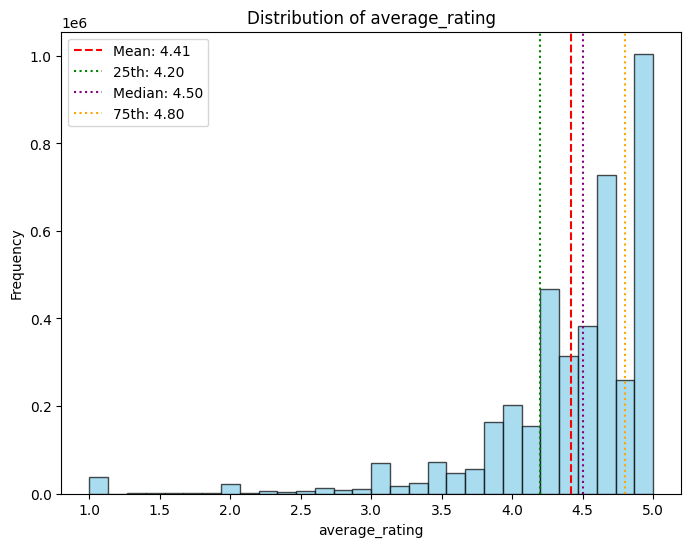

mean: 4.41
25th_percentile: 4.20
median: 4.50
75th_percentile: 4.80
90th_percentile: 5.00
95th_percentile: 5.00
99th_percentile: 5.00


--- Truncated Statistics for average_rating ---

Truncating average_rating: dropping values above 99th percentile (threshold = 5.00).


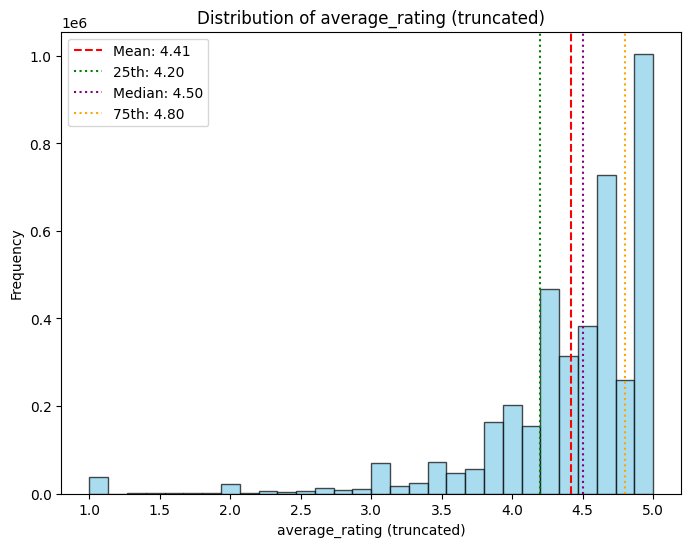

mean: 4.41
25th_percentile: 4.20
median: 4.50
75th_percentile: 4.80
90th_percentile: 5.00
95th_percentile: 5.00
99th_percentile: 5.00


--- Original Statistics for rating_number ---


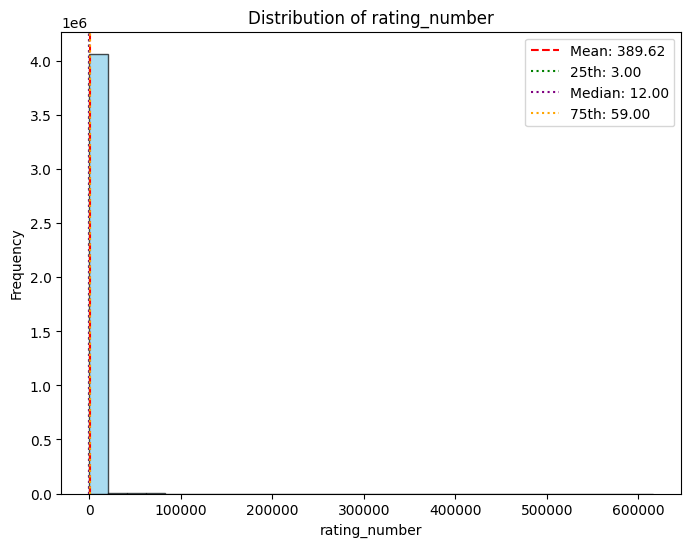

mean: 389.62
25th_percentile: 3.00
median: 12.00
75th_percentile: 59.00
90th_percentile: 363.00
95th_percentile: 1123.00
99th_percentile: 7270.16


--- Truncated Statistics for rating_number ---

Truncating rating_number: dropping values above 99th percentile (threshold = 7270.16).


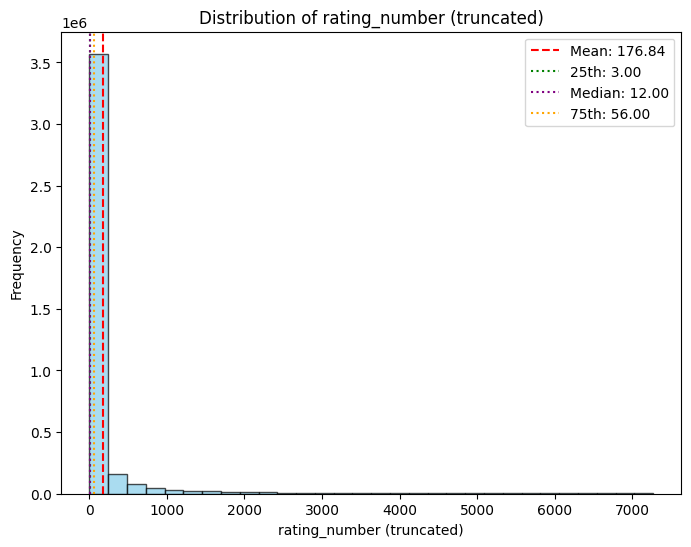

mean: 176.84
25th_percentile: 3.00
median: 12.00
75th_percentile: 56.00
90th_percentile: 311.00
95th_percentile: 867.00
99th_percentile: 3643.00


--- Original Statistics for price ---


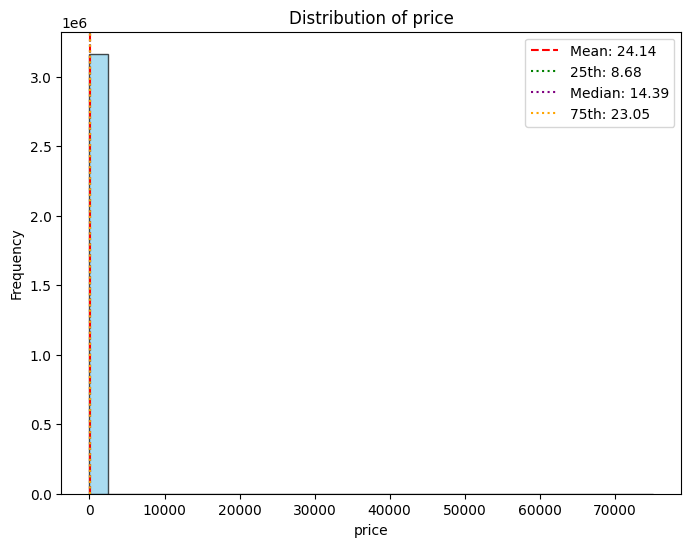

mean: 24.14
25th_percentile: 8.68
median: 14.39
75th_percentile: 23.05
90th_percentile: 43.96
95th_percentile: 68.95
99th_percentile: 179.99


--- Truncated Statistics for price ---

Truncating price: dropping values above 99th percentile (threshold = 179.99).


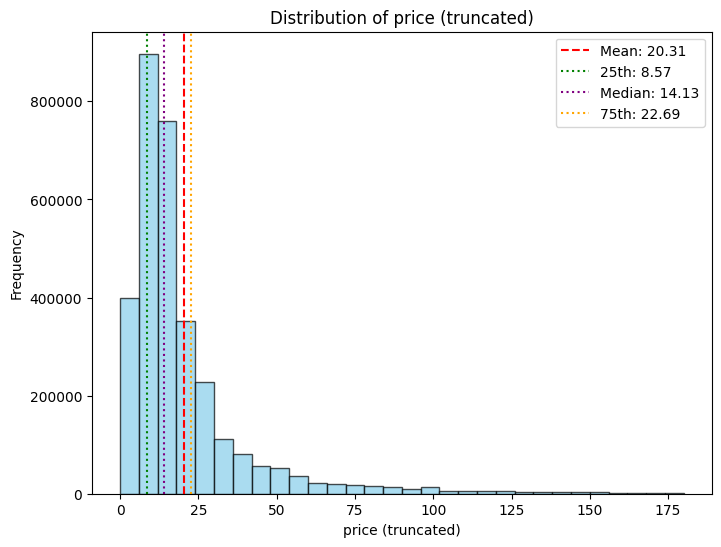

mean: 20.31
25th_percentile: 8.57
median: 14.13
75th_percentile: 22.69
90th_percentile: 40.86
95th_percentile: 60.00
99th_percentile: 117.98


=== Books Analysis Summary ===
Total records processed: 24003884

--- Original Statistics for rating ---


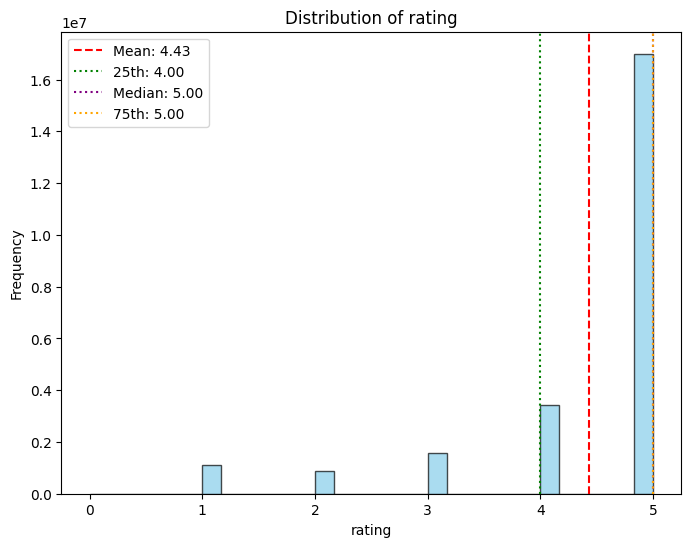

mean: 4.43
25th_percentile: 4.00
median: 5.00
75th_percentile: 5.00
90th_percentile: 5.00
95th_percentile: 5.00
99th_percentile: 5.00


--- Truncated Statistics for rating ---

Truncating rating: dropping values above 99th percentile (threshold = 5.00).


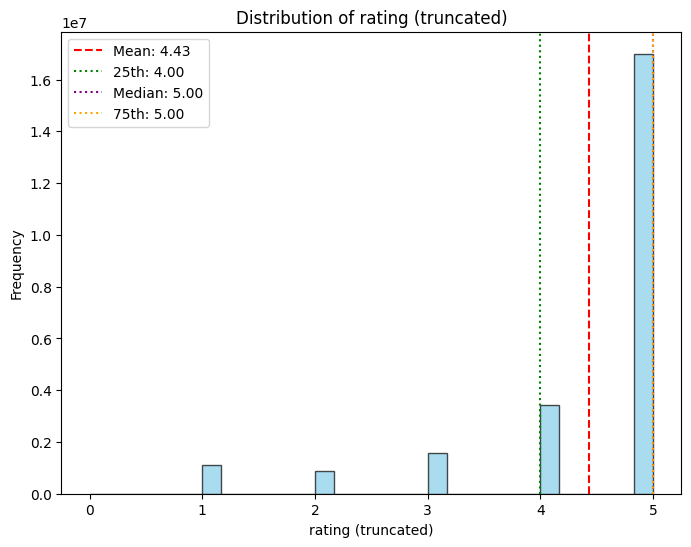

mean: 4.43
25th_percentile: 4.00
median: 5.00
75th_percentile: 5.00
90th_percentile: 5.00
95th_percentile: 5.00
99th_percentile: 5.00


--- Original Statistics for helpful_vote ---


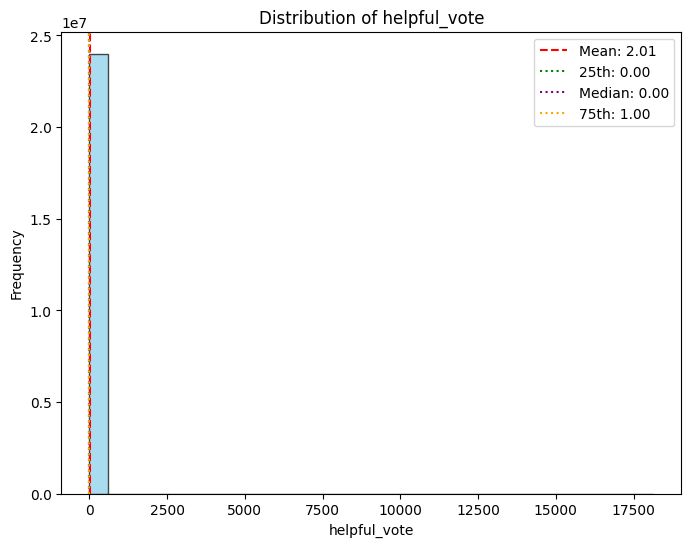

mean: 2.01
25th_percentile: 0.00
median: 0.00
75th_percentile: 1.00
90th_percentile: 4.00
95th_percentile: 8.00
99th_percentile: 27.00


--- Truncated Statistics for helpful_vote ---

Truncating helpful_vote: dropping values above 99th percentile (threshold = 27.00).


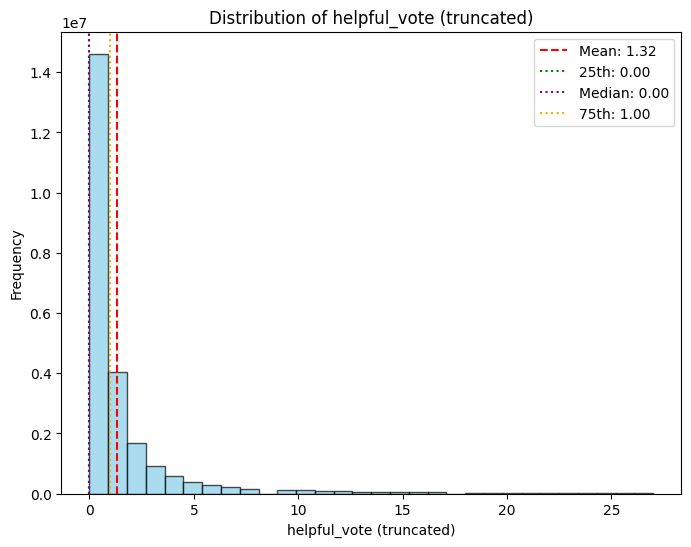

mean: 1.32
25th_percentile: 0.00
median: 0.00
75th_percentile: 1.00
90th_percentile: 4.00
95th_percentile: 7.00
99th_percentile: 17.00


--- Original Statistics for user_total_reviews ---


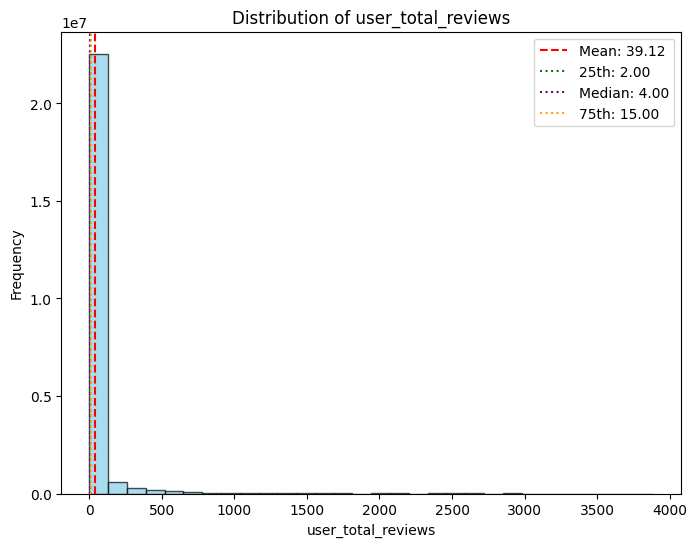

mean: 39.12
25th_percentile: 2.00
median: 4.00
75th_percentile: 15.00
90th_percentile: 64.00
95th_percentile: 167.00
99th_percentile: 673.00


--- Truncated Statistics for user_total_reviews ---

Truncating user_total_reviews: dropping values above 99th percentile (threshold = 673.00).


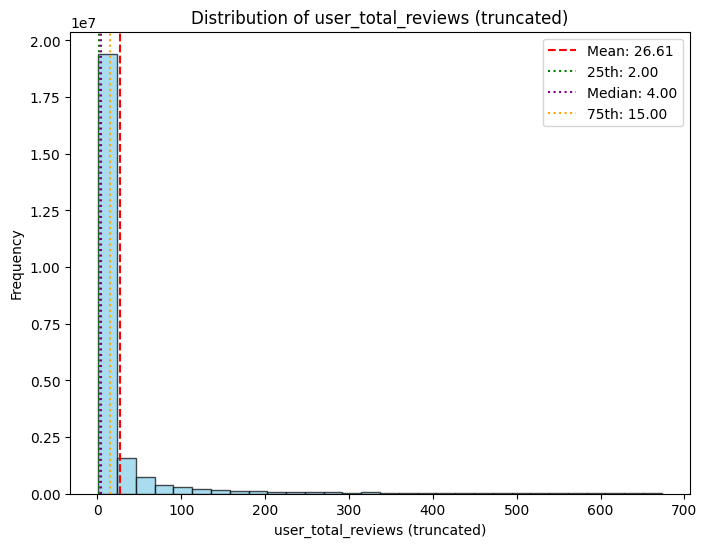

mean: 26.61
25th_percentile: 2.00
median: 4.00
75th_percentile: 15.00
90th_percentile: 56.00
95th_percentile: 133.00
99th_percentile: 438.00


--- Original Statistics for user_average_rating ---


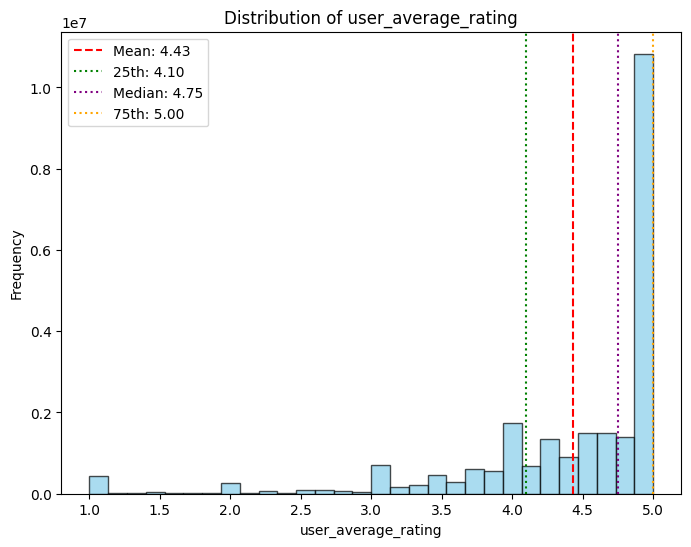

mean: 4.43
25th_percentile: 4.10
median: 4.75
75th_percentile: 5.00
90th_percentile: 5.00
95th_percentile: 5.00
99th_percentile: 5.00


--- Truncated Statistics for user_average_rating ---

Truncating user_average_rating: dropping values above 99th percentile (threshold = 5.00).


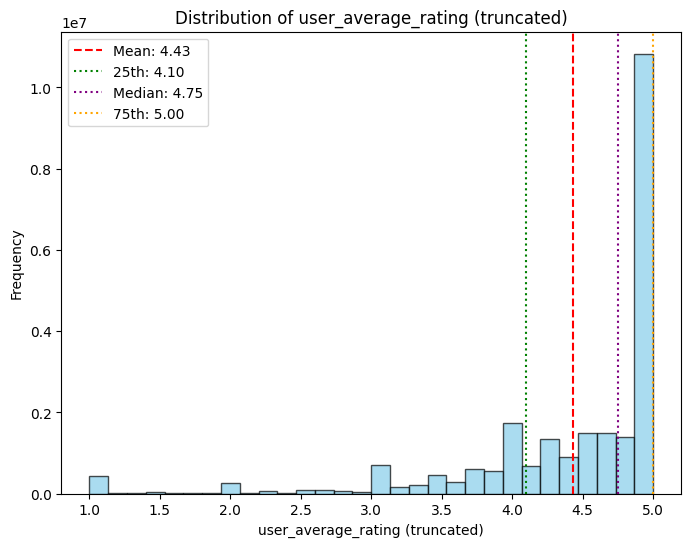

mean: 4.43
25th_percentile: 4.10
median: 4.75
75th_percentile: 5.00
90th_percentile: 5.00
95th_percentile: 5.00
99th_percentile: 5.00


--- Original Statistics for user_verified_purchase_ratio ---


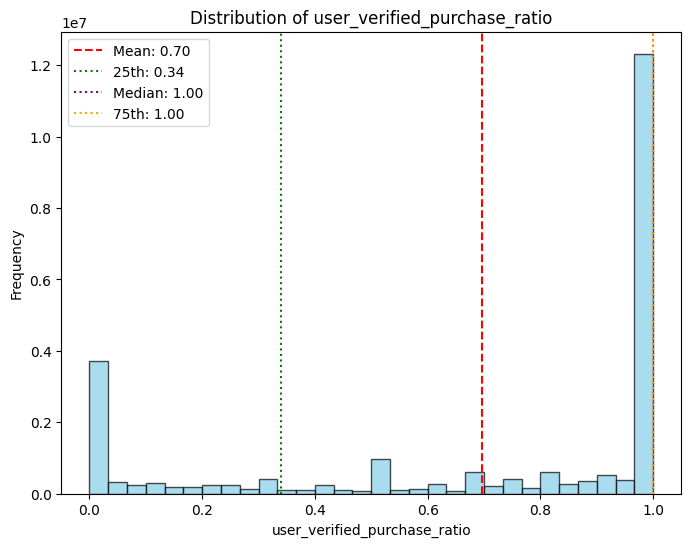

mean: 0.70
25th_percentile: 0.34
median: 1.00
75th_percentile: 1.00
90th_percentile: 1.00
95th_percentile: 1.00
99th_percentile: 1.00


--- Truncated Statistics for user_verified_purchase_ratio ---

Truncating user_verified_purchase_ratio: dropping values above 99th percentile (threshold = 1.00).


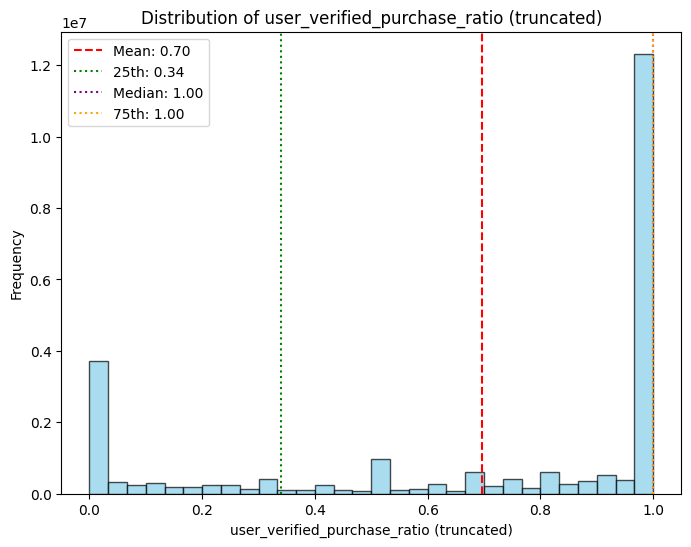

mean: 0.70
25th_percentile: 0.34
median: 1.00
75th_percentile: 1.00
90th_percentile: 1.00
95th_percentile: 1.00
99th_percentile: 1.00


=== Category Frequency Analysis Summary ===
Total records processed: 4078785
Total unique categories found: 903

Categories with at least 5000 occurrences: 159

Detailed Category Counts:
Literature & Fiction: 711135
Children's Books: 421498
Arts & Photography: 205933
Genre Fiction: 203322
History: 182800
Christian Books & Bibles: 143835
Mystery, Thriller & Suspense: 141152
Biographies & Memoirs: 139917
Crafts, Hobbies & Home: 131545
Science Fiction & Fantasy: 129279
Business & Money: 125092
New, Used & Rental Textbooks: 112032
Politics & Social Sciences: 106598
Growing Up & Facts of Life: 101448
Reference: 90808
Science & Math: 90359
Americas: 87412
Romance: 80708
Music: 77663
Teen & Young Adult: 73878
Thrillers & Suspense: 72846
Cookbooks, Food & Wine: 72769
Humor & Entertainment: 69572
Religion & Spirituality: 68547
Mystery: 67418
Education & Teachin

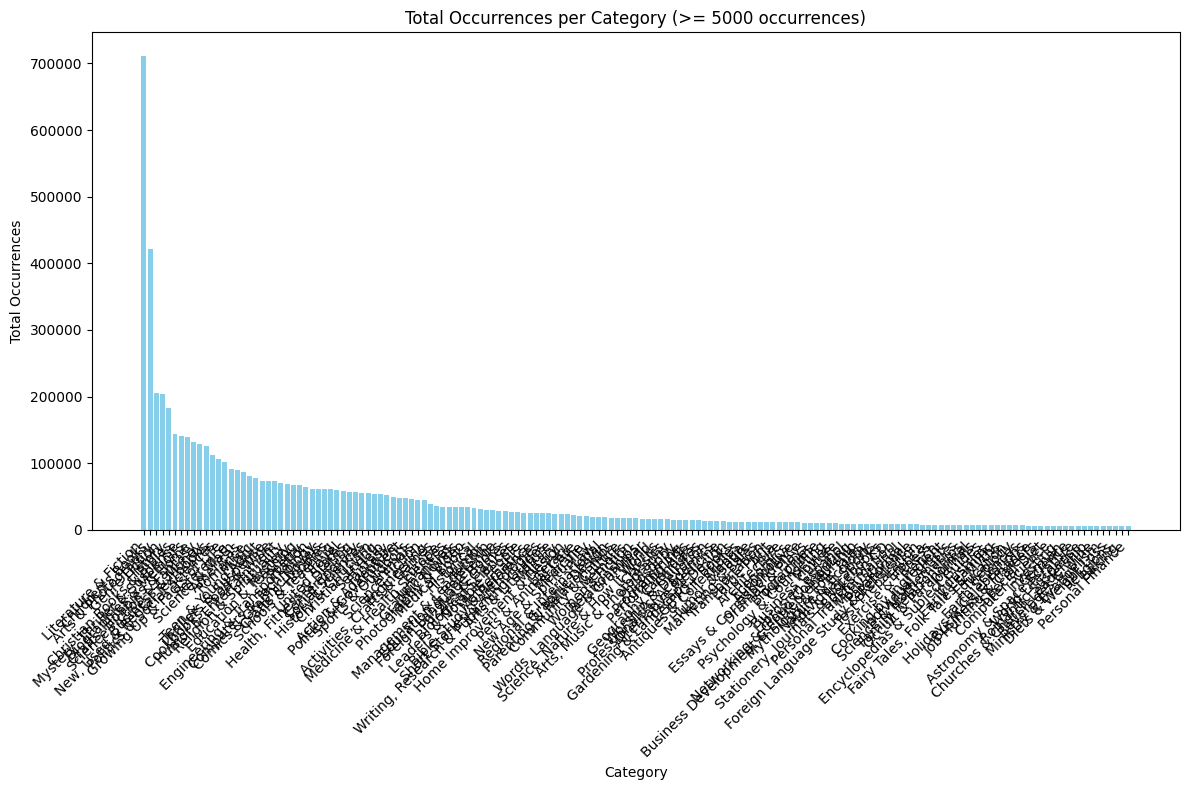

In [18]:
import json
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_statistics(values, feature_name):
    """
    Plot a histogram for the given values and overlay key statistics.
    Returns a dictionary of computed statistics.
    """
    mean_val = np.mean(values)
    quantiles = np.percentile(values, [25, 50, 75, 90, 95, 99])
    
    plt.figure(figsize=(8, 6))
    plt.hist(values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Plot the mean and selected quantiles
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(quantiles[0], color='green', linestyle=':', label=f'25th: {quantiles[0]:.2f}')
    plt.axvline(quantiles[1], color='purple', linestyle=':', label=f'Median: {quantiles[1]:.2f}')
    plt.axvline(quantiles[2], color='orange', linestyle=':', label=f'75th: {quantiles[2]:.2f}')
    
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    # Return computed statistics as a dictionary
    stats = {
        "mean": mean_val,
        "25th_percentile": quantiles[0],
        "median": quantiles[1],
        "75th_percentile": quantiles[2],
        "90th_percentile": quantiles[3],
        "95th_percentile": quantiles[4],
        "99th_percentile": quantiles[5]
    }
    return stats

def plot_feature_statistics_truncated(values, feature_name):
    """
    Drop values above the 99th percentile and re-plot the histogram.
    Returns the computed statistics on the truncated data.
    """
    threshold = np.percentile(values, 99)
    truncated_values = [v for v in values if v <= threshold]
    print(f"\nTruncating {feature_name}: dropping values above 99th percentile (threshold = {threshold:.2f}).")
    stats = plot_feature_statistics(truncated_values, feature_name + " (truncated)")
    return stats

def analyze_meta_books(file_path):
    """
    Analyze meta book data to plot statistics for average_rating, rating_number, and price.
    Prints summary statistics both for the original values and for the values after dropping the top 1%.
    """
    average_ratings = []
    rating_numbers = []
    prices = []
    total_records = 0

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            total_records += 1
            data = json.loads(line.strip())

            # Process price if available
            if 'price' in data and data['price'] is not None:
                try:
                    prices.append(float(data['price']))
                except (ValueError, TypeError):
                    pass

            average_ratings.append(float(data.get('average_rating', 0)))
            rating_numbers.append(float(data.get('rating_number', 0)))
    
    print("=== Meta Books Analysis Summary ===")
    print(f"Total records processed: {total_records}")
    print(f"Valid prices count: {len(prices)}")
    print(f"Valid average_ratings count: {len(average_ratings)}")
    print(f"Valid rating_numbers count: {len(rating_numbers)}\n")
    
    stats_summary = {}
    truncated_stats_summary = {}
    for feature, values in [('average_rating', average_ratings), 
                            ('rating_number', rating_numbers), 
                            ('price', prices)]:
        print(f"--- Original Statistics for {feature} ---")
        stats = plot_feature_statistics(values, feature)
        stats_summary[feature] = stats
        for stat_name, stat_val in stats.items():
            print(f"{stat_name}: {stat_val:.2f}")
        print("\n")
        
        print(f"--- Truncated Statistics for {feature} ---")
        t_stats = plot_feature_statistics_truncated(values, feature)
        truncated_stats_summary[feature] = t_stats
        for stat_name, stat_val in t_stats.items():
            print(f"{stat_name}: {stat_val:.2f}")
        print("\n")
    
    return stats_summary, truncated_stats_summary

def analyze_books(file_path):
    """
    Analyze books data to plot statistics for rating, helpful_vote, user_total_reviews, 
    user_average_rating, and user_verified_purchase_ratio.
    Prints summary statistics both for the original values and for the values after dropping the top 1%.
    """
    ratings = []
    helpful_votes = []
    user_total_reviews = []
    user_average_ratings = []
    user_verified_purchase_ratios = []
    total_records = 0

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            total_records += 1
            data = json.loads(line.strip())

            ratings.append(float(data.get('rating', 0)))
            helpful_votes.append(float(data.get('helpful_vote', 0)))
            user_total_reviews.append(float(data.get('user_total_reviews', 0)))
            user_average_ratings.append(float(data.get('user_average_rating', 0)))
            user_verified_purchase_ratios.append(float(data.get('user_verified_purchase_ratio', 0)))
    
    print("=== Books Analysis Summary ===")
    print(f"Total records processed: {total_records}\n")
    
    stats_summary = {}
    truncated_stats_summary = {}
    features = [
        ('rating', ratings),
        ('helpful_vote', helpful_votes),
        ('user_total_reviews', user_total_reviews),
        ('user_average_rating', user_average_ratings),
        ('user_verified_purchase_ratio', user_verified_purchase_ratios)
    ]
    
    for feature, values in features:
        print(f"--- Original Statistics for {feature} ---")
        stats = plot_feature_statistics(values, feature)
        stats_summary[feature] = stats
        for stat_name, stat_val in stats.items():
            print(f"{stat_name}: {stat_val:.2f}")
        print("\n")
        
        print(f"--- Truncated Statistics for {feature} ---")
        t_stats = plot_feature_statistics_truncated(values, feature)
        truncated_stats_summary[feature] = t_stats
        for stat_name, stat_val in t_stats.items():
            print(f"{stat_name}: {stat_val:.2f}")
        print("\n")
    
    return stats_summary, truncated_stats_summary

def analyze_category_frequency(file_path, min_category_frequency):
    """
    Count the total number of occurrences of each category from the meta book file and 
    plot a bar chart for categories with at least min_category_frequency occurrences,
    sorted in descending order. Also prints the summary statistics.
    """
    category_counts = {}
    total_records = 0

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            total_records += 1
            data = json.loads(line.strip())
            # Assumes the data includes a 'categories' key containing a list of categories
            categories = data.get('categories')
            if categories and isinstance(categories, list):
                for category in categories:
                    category_counts[category] = category_counts.get(category, 0) + 1

    print("=== Category Frequency Analysis Summary ===")
    print(f"Total records processed: {total_records}")
    print(f"Total unique categories found: {len(category_counts)}\n")
    
    # Filter out categories below the minimum frequency threshold
    filtered_counts = {cat: cnt for cat, cnt in category_counts.items() if cnt >= min_category_frequency}

    print(f"Categories with at least {min_category_frequency} occurrences: {len(filtered_counts)}")
    
    # Sort categories by total count in descending order
    sorted_categories = sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Print detailed summary
    print("\nDetailed Category Counts:")
    for cat, cnt in sorted_categories:
        print(f"{cat}: {cnt}")
    
    # Prepare data for plotting
    categories = [cat for cat, cnt in sorted_categories]
    counts = [cnt for cat, cnt in sorted_categories]
    
    plt.figure(figsize=(12, 8))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Category')
    plt.ylabel('Total Occurrences')
    plt.title(f'Total Occurrences per Category (>= {min_category_frequency} occurrences)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return filtered_counts

# Example usage in a Notebook
# Set file paths (adjust these to your local file locations if necessary)
meta_books_file = "meta_Books.jsonl/meta_Books_processed.jsonl"
books_file = "Books.jsonl/Books_processed.jsonl"

# Set minimum category frequency threshold
min_category_frequency = 5000

# Call the functions and capture summaries
meta_stats, meta_truncated_stats = analyze_meta_books(meta_books_file)
books_stats, books_truncated_stats = analyze_books(books_file)
category_stats = analyze_category_frequency(meta_books_file, min_category_frequency)


=== User Verified Purchase Ratio Analysis ===
Total records processed: 24003884
Valid 'user_verified_purchase_ratio' count: 24003884

--- Original Statistics ---


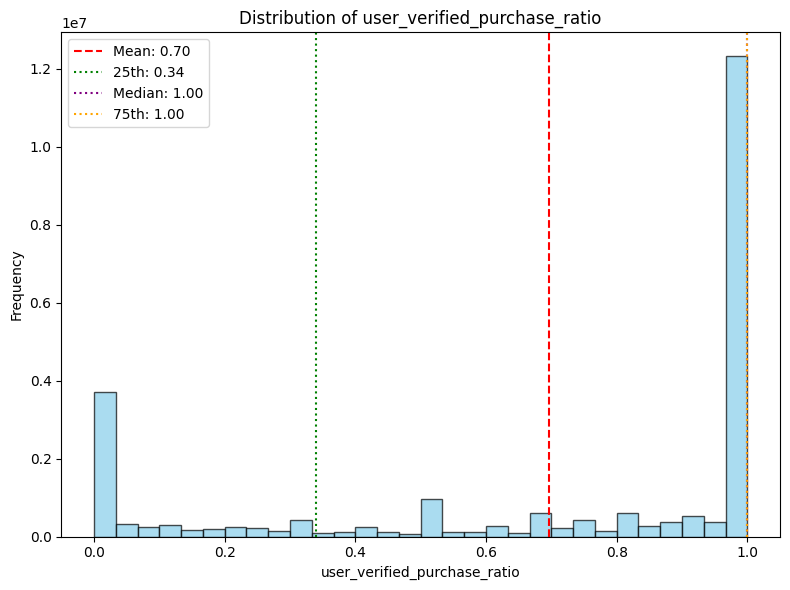

mean: 0.70
25th_percentile: 0.34
median: 1.00
75th_percentile: 1.00
90th_percentile: 1.00
95th_percentile: 1.00
99th_percentile: 1.00
total_count: 24003884

--- Truncated Statistics ---

Truncating user_verified_purchase_ratio: dropping values above 99th percentile (threshold = 1.00).


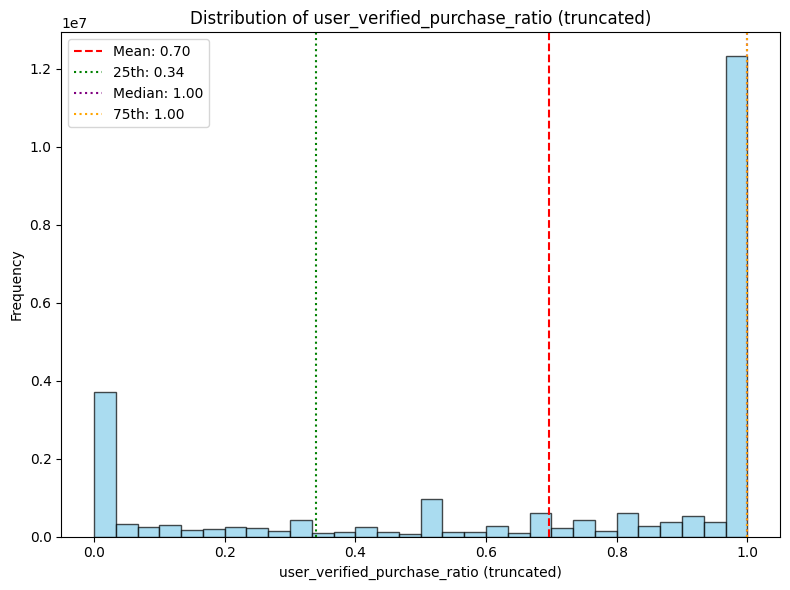

mean: 0.70
25th_percentile: 0.34
median: 1.00
75th_percentile: 1.00
90th_percentile: 1.00
95th_percentile: 1.00
99th_percentile: 1.00
total_count: 24003884


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_statistics(values, feature_name):
    """
    Plot a histogram for the given values and overlay key statistics.
    Returns a dictionary of computed statistics.
    """
    mean_val = np.mean(values)
    quantiles = np.percentile(values, [25, 50, 75, 90, 95, 99])
    
    plt.figure(figsize=(8, 6))
    plt.hist(values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(quantiles[0], color='green', linestyle=':', label=f'25th: {quantiles[0]:.2f}')
    plt.axvline(quantiles[1], color='purple', linestyle=':', label=f'Median: {quantiles[1]:.2f}')
    plt.axvline(quantiles[2], color='orange', linestyle=':', label=f'75th: {quantiles[2]:.2f}')
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    stats = {
        "mean": mean_val,
        "25th_percentile": quantiles[0],
        "median": quantiles[1],
        "75th_percentile": quantiles[2],
        "90th_percentile": quantiles[3],
        "95th_percentile": quantiles[4],
        "99th_percentile": quantiles[5],
        "total_count": len(values)
    }
    return stats

def plot_feature_statistics_truncated(values, feature_name):
    """
    Drop values above the 99th percentile and re-plot the histogram.
    Returns the computed statistics on the truncated data.
    """
    threshold = np.percentile(values, 99)
    truncated_values = [v for v in values if v <= threshold]
    print(f"\nTruncating {feature_name}: dropping values above 99th percentile (threshold = {threshold:.2f}).")
    stats = plot_feature_statistics(truncated_values, feature_name + " (truncated)")
    return stats

def analyze_verified_purchase_ratio(file_path):
    """
    Reads a JSONL file, extracts the 'user_verified_purchase_ratio' feature,
    plots its histogram, and prints summary statistics.
    """
    verified_ratios = []
    total_records = 0

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            total_records += 1
            try:
                data = json.loads(line.strip())
            except json.JSONDecodeError:
                continue
            if "user_verified_purchase_ratio" in data:
                try:
                    ratio = float(data["user_verified_purchase_ratio"])
                    verified_ratios.append(ratio)
                except (ValueError, TypeError):
                    continue

    print("=== User Verified Purchase Ratio Analysis ===")
    print(f"Total records processed: {total_records}")
    print(f"Valid 'user_verified_purchase_ratio' count: {len(verified_ratios)}\n")

    print("--- Original Statistics ---")
    stats = plot_feature_statistics(verified_ratios, "user_verified_purchase_ratio")
    for key, value in stats.items():
        if key != "total_count":
            print(f"{key}: {value:.2f}")
        else:
            print(f"{key}: {value}")
    
    print("\n--- Truncated Statistics ---")
    t_stats = plot_feature_statistics_truncated(verified_ratios, "user_verified_purchase_ratio")
    for key, value in t_stats.items():
        if key != "total_count":
            print(f"{key}: {value:.2f}")
        else:
            print(f"{key}: {value}")
    
    return stats, t_stats

if __name__ == "__main__":
    # Update the file path to your actual JSONL file that contains user_verified_purchase_ratio
    file_path = "Books.jsonl/Books_processed.jsonl"
    analyze_verified_purchase_ratio(file_path)


🗂️ Columns in meta_Books_processed.jsonl:
Index(['main_category', 'author', 'average_rating', 'rating_number', 'price',
       'store', 'categories', 'details', 'parent_asin'],
      dtype='object')

📊 Basic info of meta_Books_processed.jsonl:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   main_category   1000 non-null   object 
 1   author          729 non-null    object 
 2   average_rating  1000 non-null   float64
 3   rating_number   1000 non-null   int64  
 4   price           956 non-null    float64
 5   store           972 non-null    object 
 6   categories      1000 non-null   object 
 7   details         1000 non-null   object 
 8   parent_asin     1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB
None

📌 Sample records from meta_Books_processed.jsonl:

🔹 Line 1:
  main_category: Books
  a

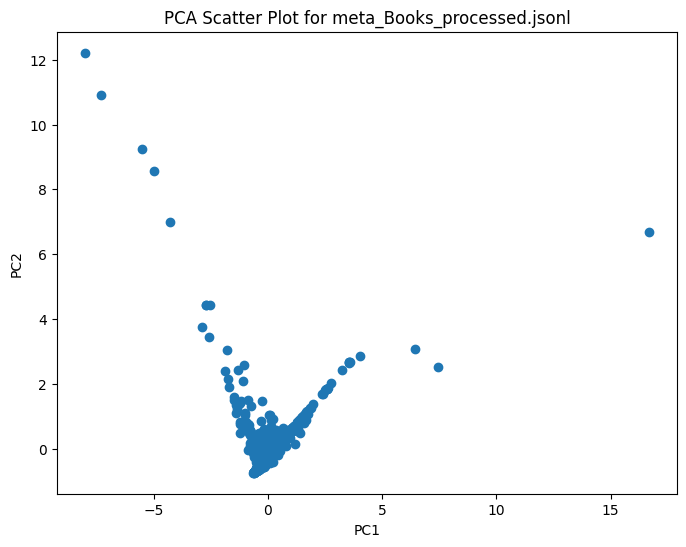


PCA Results for Books_processed.jsonl:
        PC1       PC2
0 -1.631408 -3.403689
1 -1.625373 -0.401839
2 -1.635993 -0.401993
3 -1.635939 -0.401993
4 -1.626974 -0.401936


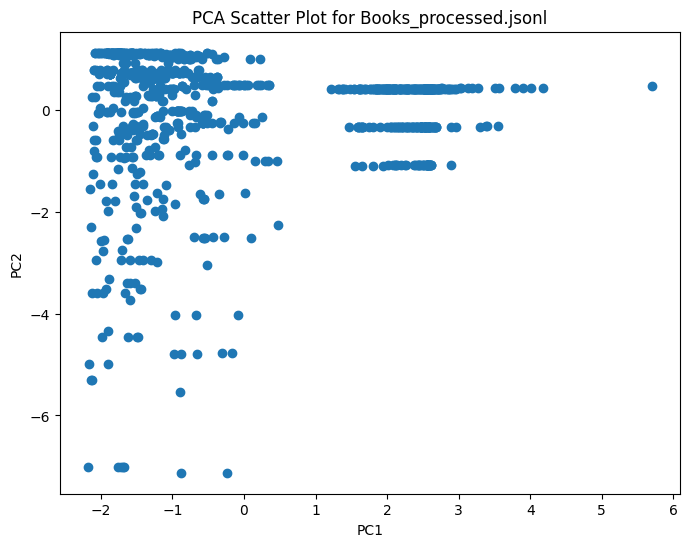

In [1]:
import json
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# === File paths ===
META_BOOKS_PATH = "meta_Books.jsonl/meta_Books_processed.jsonl"
BOOKS_PATH = "Books.jsonl/Books_processed.jsonl"

# === Load first N lines of a JSONL file ===
def load_jsonl(path, max_lines=1000):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= max_lines:
                break
            try:
                data.append(json.loads(line))
            except Exception as e:
                continue
    return pd.DataFrame(data)

# === Load datasets (first 1000 lines) ===
df_meta = load_jsonl(META_BOOKS_PATH, max_lines=1000)
df_books = load_jsonl(BOOKS_PATH, max_lines=1000)

# === Print structure and info for meta_Books_processed.jsonl ===
print("🗂️ Columns in meta_Books_processed.jsonl:")
print(df_meta.columns)

print("\n📊 Basic info of meta_Books_processed.jsonl:")
print(df_meta.info())

print("\n📌 Sample records from meta_Books_processed.jsonl:")
for i in range(min(5, len(df_meta))):
    record = df_meta.iloc[i]
    print(f"\n🔹 Line {i+1}:")
    for k, v in record.items():
        print(f"  {k}: {str(v)[:1000]}")
    print("-" * 40)

# === Print structure and info for Books_processed.jsonl ===
print("\n🗂️ Columns in Books_processed.jsonl:")
print(df_books.columns)

print("\n📊 Basic info of Books_processed.jsonl:")
print(df_books.info())

print("\n📌 Sample records from Books_processed.jsonl:")
for i in range(min(5, len(df_books))):
    record = df_books.iloc[i]
    print(f"\n🔸 Line {i+1}:")
    for k, v in record.items():
        print(f"  {k}: {str(v)[:1000]}")
    print("-" * 40)

# === PCA for meta_Books_processed.jsonl ===
# Select numeric columns: average_rating, rating_number, price
meta_numeric_cols = ['average_rating', 'rating_number', 'price']
df_meta_numeric = df_meta[meta_numeric_cols].dropna()

# Standardize the meta data
scaler_meta = StandardScaler()
X_meta_scaled = scaler_meta.fit_transform(df_meta_numeric)

# Apply PCA (reduce to 2 components)
pca_meta = PCA(n_components=2)
meta_pca_components = pca_meta.fit_transform(X_meta_scaled)

# Create a DataFrame for PCA results
df_meta_pca = pd.DataFrame(meta_pca_components, columns=['PC1', 'PC2'])

print("\nPCA Results for meta_Books_processed.jsonl:")
print(df_meta_pca.head())

# Plot the PCA scatter plot for meta data
plt.figure(figsize=(8,6))
plt.scatter(df_meta_pca['PC1'], df_meta_pca['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot for meta_Books_processed.jsonl")
plt.show()

# === PCA for Books_processed.jsonl ===
# Select numeric columns for Books_processed.jsonl:
books_numeric_cols = ['rating', 'timestamp', 'helpful_vote', 
                      'user_total_reviews', 'user_average_rating', 
                      'user_total_helpful_votes', 'user_verified_purchase_ratio']
df_books_numeric = df_books[books_numeric_cols].dropna()

# Standardize the books data
scaler_books = StandardScaler()
X_books_scaled = scaler_books.fit_transform(df_books_numeric)

# Apply PCA (reduce to 2 components)
pca_books = PCA(n_components=2)
books_pca_components = pca_books.fit_transform(X_books_scaled)

# Create a DataFrame for PCA results
df_books_pca = pd.DataFrame(books_pca_components, columns=['PC1', 'PC2'])

print("\nPCA Results for Books_processed.jsonl:")
print(df_books_pca.head())

# Plot the PCA scatter plot for books data
plt.figure(figsize=(8,6))
plt.scatter(df_books_pca['PC1'], df_books_pca['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot for Books_processed.jsonl")
plt.show()


PCA Results for meta_Books_processed.jsonl:
        PC1       PC2
0 -0.090701 -0.284912
1 -0.621516 -0.737780
2 -1.705713  1.899690
3  0.004362 -0.194172
4 -0.620555 -0.733945

t-SNE Results for meta_Books_processed.jsonl:
       tSNE1      tSNE2
0  13.621499 -20.643110
1 -11.896361 -45.538311
2 -12.217724  23.128468
3  13.488111  -0.141915
4 -12.111664 -45.158154


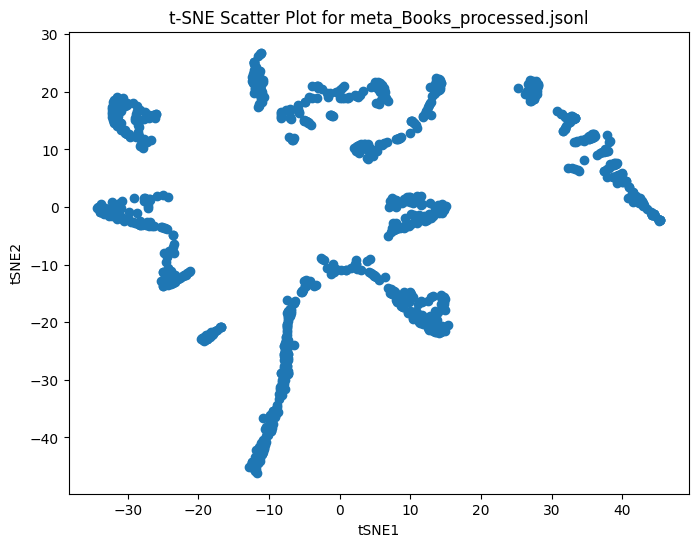


PCA Results for Books_processed.jsonl:
        PC1       PC2
0 -1.631408 -3.403689
1 -1.625373 -0.401839
2 -1.635993 -0.401993
3 -1.635939 -0.401993
4 -1.626974 -0.401936

t-SNE Results for Books_processed.jsonl:
       tSNE1      tSNE2
0 -23.852583 -22.641897
1 -11.081282 -10.592202
2 -11.084827 -10.594808
3 -11.084935 -10.594704
4 -11.103991 -10.576919


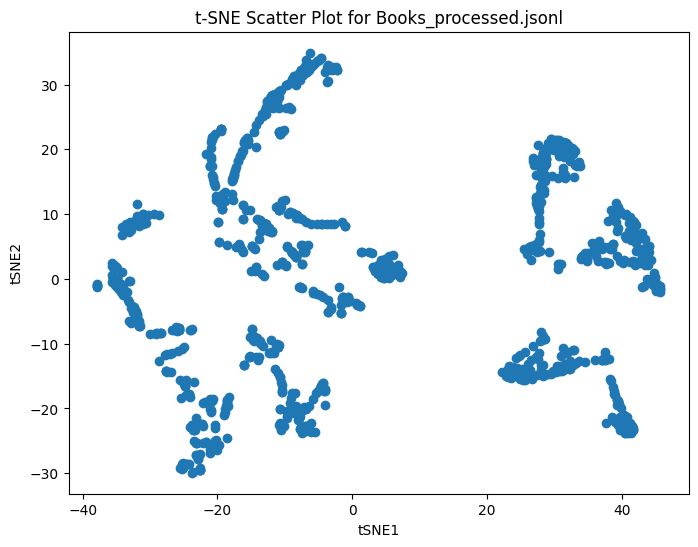

In [2]:
import json
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# === File paths ===
META_BOOKS_PATH = "meta_Books.jsonl/meta_Books_processed.jsonl"
BOOKS_PATH = "Books.jsonl/Books_processed.jsonl"

# === Load first N lines of a JSONL file ===
def load_jsonl(path, max_lines=1000):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= max_lines:
                break
            try:
                data.append(json.loads(line))
            except Exception as e:
                continue
    return pd.DataFrame(data)

# === Load datasets (first 1000 lines) ===
df_meta = load_jsonl(META_BOOKS_PATH, max_lines=1000)
df_books = load_jsonl(BOOKS_PATH, max_lines=1000)

# === PCA for meta_Books_processed.jsonl ===
# Select numeric columns: average_rating, rating_number, price
meta_numeric_cols = ['average_rating', 'rating_number', 'price']
df_meta_numeric = df_meta[meta_numeric_cols].dropna()

# Standardize the meta data
scaler_meta = StandardScaler()
X_meta_scaled = scaler_meta.fit_transform(df_meta_numeric)

# PCA (optional for comparison)
pca_meta = PCA(n_components=2)
meta_pca_components = pca_meta.fit_transform(X_meta_scaled)
df_meta_pca = pd.DataFrame(meta_pca_components, columns=['PC1', 'PC2'])
print("PCA Results for meta_Books_processed.jsonl:")
print(df_meta_pca.head())

# t-SNE for meta_Books_processed.jsonl
tsne_meta = TSNE(n_components=2, random_state=42)
meta_tsne_components = tsne_meta.fit_transform(X_meta_scaled)
df_meta_tsne = pd.DataFrame(meta_tsne_components, columns=['tSNE1', 'tSNE2'])
print("\nt-SNE Results for meta_Books_processed.jsonl:")
print(df_meta_tsne.head())

# Plot the t-SNE scatter plot for meta data
plt.figure(figsize=(8,6))
plt.scatter(df_meta_tsne['tSNE1'], df_meta_tsne['tSNE2'])
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("t-SNE Scatter Plot for meta_Books_processed.jsonl")
plt.show()


# === PCA for Books_processed.jsonl ===
# Select numeric columns:
books_numeric_cols = ['rating', 'timestamp', 'helpful_vote', 
                      'user_total_reviews', 'user_average_rating', 
                      'user_total_helpful_votes', 'user_verified_purchase_ratio']
df_books_numeric = df_books[books_numeric_cols].dropna()

# Standardize the books data
scaler_books = StandardScaler()
X_books_scaled = scaler_books.fit_transform(df_books_numeric)

# PCA (optional for comparison)
pca_books = PCA(n_components=2)
books_pca_components = pca_books.fit_transform(X_books_scaled)
df_books_pca = pd.DataFrame(books_pca_components, columns=['PC1', 'PC2'])
print("\nPCA Results for Books_processed.jsonl:")
print(df_books_pca.head())

# t-SNE for Books_processed.jsonl
tsne_books = TSNE(n_components=2, random_state=42)
books_tsne_components = tsne_books.fit_transform(X_books_scaled)
df_books_tsne = pd.DataFrame(books_tsne_components, columns=['tSNE1', 'tSNE2'])
print("\nt-SNE Results for Books_processed.jsonl:")
print(df_books_tsne.head())

# Plot the t-SNE scatter plot for books data
plt.figure(figsize=(8,6))
plt.scatter(df_books_tsne['tSNE1'], df_books_tsne['tSNE2'])
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("t-SNE Scatter Plot for Books_processed.jsonl")
plt.show()


In [1]:
import json

def stream_jsonl(filepath):
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            for line in f:
                yield json.loads(line)
    except FileNotFoundError:
        print(f"Error: The file at {filepath} was not found.")
        return
    except json.JSONDecodeError:
        print("Error: There was an issue decoding the JSON data.")
        return

# Path to your JSONL file
BOOKS_PATH = "Books.jsonl/Books.jsonl"

timestamps = []
for row in stream_jsonl(BOOKS_PATH):
    if 'timestamp' in row:
        timestamps.append(row['timestamp'])

# Check if the timestamps are sorted in non-decreasing order
if timestamps:
    is_sorted = all(timestamps[i] <= timestamps[i+1] for i in range(len(timestamps) - 1))
    if is_sorted:
        print("The data is sorted in ascending order of timestamps.")
    else:
        print("The data is not sorted by timestamps.")
else:
    print("No timestamps were found in the data.")


The data is not sorted by timestamps.


In [7]:
import os
import json
import csv
import numpy as np
import random
from collections import defaultdict

# === Binning Functions (Amazon version) ===
def bin_avg_rating(avg):
    if avg < 3.5:
        return 3000
    elif avg < 4.2:
        return 3001
    elif avg < 4.5:
        return 3002
    elif avg < 4.8:
        return 3003
    else:
        return 3004

def bin_rating_count(cnt):
    if cnt < 10:
        return 3010
    elif cnt < 70:
        return 3011
    elif cnt < 500:
        return 3012
    elif cnt < 2000:
        return 3013
    else:
        return 3014

def bin_price(price):
    if price < 9:
        return 3020
    elif price < 15:
        return 3021
    elif price < 25:
        return 3022
    elif price < 70:
        return 3023
    else:
        return 3024

def bin_helpful_vote(v):
    if v == 0:
        return 1120
    elif v < 5:
        return 1121
    elif v < 20:
        return 1122
    else:
        return 1123

def bin_user_avg_rating(avg):
    if avg < 3.5:
        return 1100
    elif avg < 4.1:
        return 1101
    elif avg < 4.75:
        return 1102
    else:
        return 1103

def bin_user_total_reviews(cnt):
    if cnt < 5:
        return 1110
    elif cnt < 20:
        return 1111
    elif cnt < 100:
        return 1112
    elif cnt < 500:
        return 1113
    else:
        return 1114

def bin_user_verified_purchase_ratio(ratio):
    if ratio < 0.35:
        return 1130
    elif ratio < 0.75:
        return 1131
    else:
        return 1132

def safe_parse_price(price):
    try:
        return float(price)
    except (ValueError, TypeError):
        return 0

def stream_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            yield json.loads(line)

# --- Utility to Count Unique Features (excluding ID fields) ---
def count_unique_features(user_features, item_features):
    unique_vals = set()
    # For user features, assume the first field is the ID; include the rest.
    for feats in user_features.values():
        unique_vals.update(feats[1:])
    # For item features, assume the first field is the ID; include the rest.
    for feats in item_features.values():
        unique_vals.update(feats[1:])
    return len(unique_vals)

# --- Count Components for Amazon Dataset ---
def count_amazon_components(meta_file, user_file, target_categories, min_item_reviews, min_user_reviews, subsample_ratio=1.0, add_category_feature=False):
    """
    Returns a dictionary with keys:
      n_users: Number of eligible users (users with at least 2 interactions)
      n_items: Number of distinct items that appear in eligible interactions
      n_interactions: Total number of interactions (instances)
      n_unique_features: Number of unique (binned) feature values (excluding IDs)
      n_fields: Total number of fields per instance (user features + item features)
    
    For single-category cases (add_category_feature=False), the item vector is:
      [item_id, binned_avg_rating, binned_rating_count, binned_price]  --> 4 fields
    and the user vector is:
      [user_id, bin_helpful_vote, bin_user_avg_rating, bin_user_total_reviews, bin_user_verified_purchase_ratio]  --> 5 fields

    For multi-category cases (add_category_feature=True), an additional field is added to the item vector:
      [item_id, binned_avg_rating, binned_rating_count, binned_price, category_feature]  --> 5 fields,
    making the total fields = 5 (user) + 5 (item) = 10.
    """
    # Convert target_categories to a set for membership checking.
    target_categories = set(target_categories)
    
    # --- Step 1: Process meta_file to build item features ---
    rating_numbers_list = []
    prices_list = []
    for row in stream_jsonl(meta_file):
        raw_cats = row.get("categories", "")
        if not raw_cats:
            continue
        if isinstance(raw_cats, list):
            cats = [cat.strip() for cat in raw_cats if cat.strip()]
        else:
            cats = [cat.strip() for cat in raw_cats.split(',') if cat.strip()]
        if not set(cats).intersection(target_categories):
            continue
        try:
            rn = float(row.get("rating_number", 0))
            if rn < min_item_reviews:
                continue
            rating_numbers_list.append(rn)
        except:
            continue
        pr = safe_parse_price(row.get("price"))
        prices_list.append(pr)
    
    rating_number_threshold = np.percentile(rating_numbers_list, 75) if rating_numbers_list else float("inf")
    price_threshold = np.percentile(prices_list, 75) if prices_list else float("inf")
    
    # Build item feature vectors.
    # For single category: [item_id, binned_avg_rating, binned_rating_count, binned_price]
    # For multi category: add an extra category_feature field.
    item2id = {}
    item_feat_dict = {}
    item_id_base = 1

    # If multi-category, prepare a prime mapping to combine category information.
    if add_category_feature:
        primes = [2, 3, 5, 7, 11, 13]  # Ensure enough primes for your categories.
        prime_map = {}
        for i, cat in enumerate(sorted(target_categories)):
            prime_map[cat] = primes[i]
    
    for row in stream_jsonl(meta_file):
        raw_cats = row.get("categories", "")
        if not raw_cats:
            continue
        if isinstance(raw_cats, list):
            cats = [cat.strip() for cat in raw_cats if cat.strip()]
        else:
            cats = [cat.strip() for cat in raw_cats.split(',') if cat.strip()]
        if not set(cats).intersection(target_categories):
            continue
        try:
            rn_val = float(row.get("rating_number", 0))
            if rn_val < min_item_reviews:
                continue
        except:
            continue
        price_val = safe_parse_price(row.get("price"))
        if rn_val > rating_number_threshold or price_val > price_threshold:
            continue
        pid = row['parent_asin']
        if pid not in item2id:
            item2id[pid] = item_id_base
            item_id_base += 1
        
        if add_category_feature:
            # Compute category feature as the product of primes for each target category present.
            cat_feature = 1
            for cat in cats:
                if cat in target_categories:
                    cat_feature *= prime_map[cat]
            features = [
                item2id[pid],
                bin_avg_rating(row['average_rating']),
                bin_rating_count(rn_val),
                bin_price(price_val),
                cat_feature
            ]
        else:
            features = [
                item2id[pid],
                bin_avg_rating(row['average_rating']),
                bin_rating_count(rn_val),
                bin_price(price_val)
            ]
        item_feat_dict[pid] = features

    # --- Step 2: Process user_file to build user features and interactions ---
    # User feature vector: [user_id, bin_helpful_vote, bin_user_avg_rating, bin_user_total_reviews, bin_user_verified_purchase_ratio]
    user2id = {}
    user_feat_dict = {}
    user_interactions = defaultdict(list)
    user_id_base = 1
    for row in stream_jsonl(user_file):
        uid = row['user_id']
        pid = row['parent_asin']
        if pid not in item_feat_dict:
            continue
        try:
            user_reviews = int(row.get("user_total_reviews", 0))
        except:
            continue
        if user_reviews < min_user_reviews:
            continue
        if uid not in user2id:
            user2id[uid] = user_id_base
            user_id_base += 1
        if uid not in user_feat_dict:
            user_feat_dict[uid] = [
                user2id[uid],
                bin_helpful_vote(row['helpful_vote']),
                bin_user_avg_rating(row['user_average_rating']),
                bin_user_total_reviews(row['user_total_reviews']),
                bin_user_verified_purchase_ratio(row['user_verified_purchase_ratio'])
            ]
        timestamp = int(row.get("timestamp", 0))
        user_interactions[uid].append((timestamp, pid))
    
    # --- Step 3: Filter users with at least 2 interactions ---
    eligible_user_interactions = {uid: inter for uid, inter in user_interactions.items() if len(inter) >= 2}
    if subsample_ratio < 1.0:
        bins = defaultdict(list)
        for uid, inter in eligible_user_interactions.items():
            bins[len(inter)].append(uid)
        sampled = {}
        for count, uid_list in bins.items():
            sample_size = max(1, int(len(uid_list) * subsample_ratio))
            sampled_uids = random.sample(uid_list, sample_size)
            for uid in sampled_uids:
                sampled[uid] = eligible_user_interactions[uid]
        eligible_user_interactions = sampled
    
    # --- Step 4: Count Components ---
    n_users = len(eligible_user_interactions)
    n_interactions = sum(len(inter) for inter in eligible_user_interactions.values())
    items_in_interactions = set()
    for inter in eligible_user_interactions.values():
        for _, pid in inter:
            items_in_interactions.add(pid)
    n_items = len(items_in_interactions)
    n_unique_features = count_unique_features(user_feat_dict, item_feat_dict)
    
    # Total fields per instance: user vector (always 5 fields) + item vector.
    item_field_count = 5 if add_category_feature else 4
    n_fields = 5 + item_field_count
    
    return {
        "n_users": n_users,
        "n_items": n_items,
        "n_interactions": n_interactions,
        "n_unique_features": n_unique_features,
        "n_fields": n_fields
    }

# --- Example Usage: 4 Cases (3 Single-Category and 1 Multi-Category) ---
if __name__ == "__main__":
    # Set file paths and parameters.
    META_FILE = "meta_Books.jsonl/meta_Books_processed.jsonl"
    USER_FILE = "Books.jsonl/Books_processed.jsonl"
    target_categories = ["Arts & Photography", "Genre Fiction", "History"]
    min_item_reviews = 59
    min_user_reviews = 15
    subsample_ratio = 1.0

    # Case 1, 2, 3: Single-Category cases (without category feature)
    stats_single_cases = {}
    for cat in target_categories:
        stats = count_amazon_components(
            meta_file=META_FILE,
            user_file=USER_FILE,
            target_categories=[cat],  # single category only
            min_item_reviews=min_item_reviews,
            min_user_reviews=min_user_reviews,
            subsample_ratio=subsample_ratio,
            add_category_feature=False
        )
        stats_single_cases[cat] = stats
    
    # Case 4: Multi-Category case (with category feature)
    stats_multi = count_amazon_components(
        meta_file=META_FILE,
        user_file=USER_FILE,
        target_categories=target_categories,  # all categories combined
        min_item_reviews=min_item_reviews,
        min_user_reviews=min_user_reviews,
        subsample_ratio=subsample_ratio,
        add_category_feature=True
    )
    
    # Print the results.
    print("=== Amazon Dataset Statistical Summary (Single-Category Cases) ===")
    for cat in target_categories:
        stats = stats_single_cases[cat]
        print(f"\n--- Single Category: {cat} ---")
        print("# Users (eligible):", stats["n_users"])
        print("# Items:", stats["n_items"])
        print("# Interactions (Instances):", stats["n_interactions"])
        print("# Unique Features (excluding IDs):", stats["n_unique_features"])
        print("# Fields (per instance):", stats["n_fields"])
    
    print("\n=== Amazon Dataset Statistical Summary (Multi-Category Case) ===")
    print("# Users (eligible):", stats_multi["n_users"])
    print("# Items:", stats_multi["n_items"])
    print("# Interactions (Instances):", stats_multi["n_interactions"])
    print("# Unique Features (excluding IDs):", stats_multi["n_unique_features"])
    print("# Fields (per instance):", stats_multi["n_fields"])


=== Amazon Dataset Statistical Summary (Single-Category Cases) ===

--- Single Category: Arts & Photography ---
# Users (eligible): 10180
# Items: 10690
# Interactions (Instances): 33781
# Unique Features (excluding IDs): 26
# Fields (per instance): 9

--- Single Category: Genre Fiction ---
# Users (eligible): 35391
# Items: 38709
# Interactions (Instances): 211966
# Unique Features (excluding IDs): 26
# Fields (per instance): 9

--- Single Category: History ---
# Users (eligible): 10709
# Items: 11689
# Interactions (Instances): 40356
# Unique Features (excluding IDs): 25
# Fields (per instance): 9

=== Amazon Dataset Statistical Summary (Multi-Category Case) ===
# Users (eligible): 57350
# Items: 62503
# Interactions (Instances): 298738
# Unique Features (excluding IDs): 29
# Fields (per instance): 10
